In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
benin_df = pd.read_csv("data/benin-malanville.csv", parse_dates=["Timestamp"])

In [5]:
display(benin_df.head())
display(benin_df.info())
display(benin_df.describe())

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

None

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


In [6]:
missing = benin_df.isna().mean() * 100
print("Missing over 5%:\n", missing[missing > 5])

Missing over 5%:
 Comments    100.0
dtype: float64


In [7]:
num_cols = ["GHI", "DNI", "DHI", "TModA", "TModB", "WS", "WSgust"]
z_scores = benin_df[num_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Outliers:\n", outliers)

Outliers:
 GHI         89
DNI          0
DHI       3738
TModA       10
TModB       98
WS        3109
WSgust    3500
dtype: int64


<ipython-input-9-52daa898fb3d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  benin_df = benin_df[(z_scores.abs() <= 3).all(axis=1)]


Text(0.5, 1.0, 'GHI vs Tamb (bubble size = RH)')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


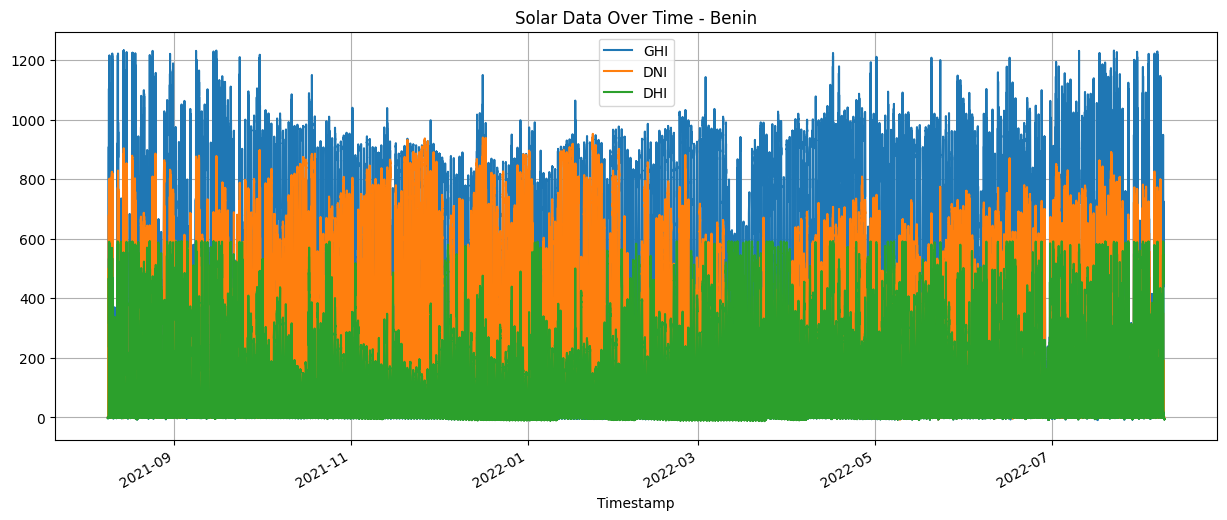

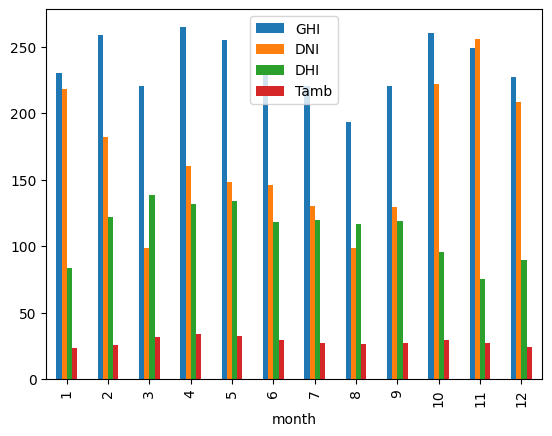

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


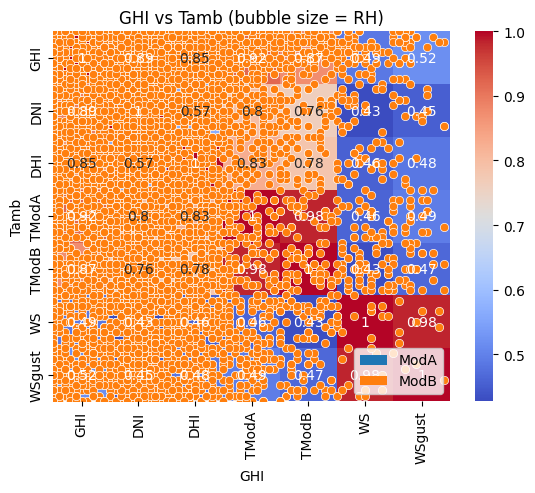

In [9]:
# Cleaning: Fill missing values
benin_df[num_cols] = benin_df[num_cols].fillna(benin_df[num_cols].median())

# Drop extreme outliers
benin_df = benin_df[(z_scores.abs() <= 3).all(axis=1)]

# Save cleaned version
benin_df.to_csv("data/benin_clean.csv", index=False)

# Add time features
benin_df["month"] = benin_df["Timestamp"].dt.month

# Time series plot
benin_df.set_index("Timestamp")[["GHI", "DNI", "DHI"]].plot(figsize=(15, 6))
plt.title("Solar Data Over Time - Benin")
plt.grid()

# Monthly averages
benin_df.groupby("month")[["GHI", "DNI", "DHI", "Tamb"]].mean().plot(kind="bar")

# Cleaning impact
benin_df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind="bar")

# Correlation
sns.heatmap(benin_df[num_cols].corr(), annot=True, cmap="coolwarm")

# Scatter plots
sns.scatterplot(data=benin_df, x="RH", y="Tamb")
sns.scatterplot(data=benin_df, x="WS", y="GHI")

# Bubble chart
plt.scatter(benin_df["GHI"], benin_df["Tamb"], s=benin_df["RH"], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb (bubble size = RH)")